# Multinomial Naive Bayes — Advanced Theory & Interview Q&A

## Advanced Theory

- **Bayes’ Theorem:** Calculates posterior probability using prior and likelihood.
- **Multinomial Assumption:** Features are discrete counts (e.g., word frequencies).
- **Conditional Independence:** Assumes features are independent given the class label.
- **Smoothing (alpha):** Prevents zero probabilities for unseen features.
- **Feature Engineering:** Remove stopwords, use TF-IDF, select informative features.
- **Class Imbalance:** Adjust prior probabilities or use ComplementNB.
- **Extensions:** ComplementNB (imbalanced data), BernoulliNB (binary features).
- **Diagnostics:** Confusion matrix, ROC-AUC, precision-recall curves.
- **Limitations:** Sensitive to correlated features and non-discrete data.

## Advanced Interview Q&A

**Q1: What is the main assumption of MultinomialNB?**  
A: Features are conditionally independent and represent discrete counts.

**Q2: How do you handle zero probabilities in MultinomialNB?**  
A: Use Laplace smoothing (alpha > 0).

**Q3: How do you handle class imbalance?**  
A: Adjust prior probabilities, use ComplementNB, or resample.

**Q4: What is the impact of correlated features?**  
A: Violates independence assumption, can degrade performance.

**Q5: How do you assess model fit?**  
A: Use accuracy, ROC-AUC, precision-recall curves, confusion matrix.

**Q6: What is ComplementNB?**  
A: A variant for imbalanced data, improves performance over MultinomialNB.

**Q7: How do you handle continuous features?**  
A: Use GaussianNB or discretize features.

**Q8: How do you select informative features?**  
A: Use feature selection, TF-IDF, or domain knowledge.

**Q9: How do you handle categorical variables?**  
A: Encode as counts or use BernoulliNB for binary features.

**Q10: What is the role of alpha in MultinomialNB?**  
A: Controls smoothing, prevents zero probabilities.

# Multinomial Naive Bayes Classification — Theory & Interview Q&A

Multinomial Naive Bayes is a probabilistic classifier based on Bayes’ theorem, suitable for discrete feature counts (e.g., word frequencies in text).

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Classifies data using Bayes’ theorem and multinomial distribution.      |
| **Equation**          | P(y|X) ∝ P(X|y)P(y), P(X|y) is multinomial                             |
| **Use Cases**         | Text classification, spam detection, sentiment analysis                 |
| **Assumptions**       | Feature independence, discrete feature counts                           |
| **Pros**              | Fast, simple, works well for text data                                  |
| **Cons**              | Assumes independence, not suitable for continuous features              |
| **Key Parameters**    | alpha (smoothing)                                                       |
| **Evaluation Metrics**| Accuracy, Precision, Recall, F1-score                                   |

## Interview Q&A

**Q1: When do you use Multinomial Naive Bayes?**  
A: For classification tasks with discrete features, like word counts.

**Q2: What is the role of alpha in MultinomialNB?**  
A: It is a smoothing parameter to handle zero counts.

**Q3: What is the main assumption?**  
A: Features are independent given the class.

**Q4: How is MultinomialNB different from GaussianNB?**  
A: MultinomialNB is for discrete features, GaussianNB for continuous.

**Q5: How do you evaluate MultinomialNB?**  
A: Using accuracy, precision, recall, and F1-score.

**Q6: What are the limitations?**  
A: Poor performance if features are correlated or not discrete.

In [24]:
# 1️⃣ Imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [25]:
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'talk.politics.misc']

In [26]:
categories

['alt.atheism', 'comp.graphics', 'sci.med', 'talk.politics.misc']

In [27]:
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [28]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('mnb', MultinomialNB())
])

In [29]:
param_grid = {
    'vect__max_df': [0.5, 0.75, 1.0],
    'tfidf__use_idf': [True, False],
    'mnb__alpha': [0.1, 1.0, 10.0]
}


In [30]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,Pipeline(step...inomialNB())])
,param_grid,"{'mnb__alpha': [0.1, 1.0, ...], 'tfidf__use_idf': [True, False], 'vect__max_df': [0.5, 0.75, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [31]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best Parameters: {'mnb__alpha': 0.1, 'tfidf__use_idf': True, 'vect__max_df': 0.75}
Test Accuracy: 0.8983050847457628

Classification Report:
                     precision    recall  f1-score   support

       alt.atheism       0.92      0.84      0.88       167
     comp.graphics       0.95      0.94      0.94       191
           sci.med       0.86      0.94      0.90       201
talk.politics.misc       0.86      0.87      0.86       149

          accuracy                           0.90       708
         macro avg       0.90      0.89      0.90       708
      weighted avg       0.90      0.90      0.90       708



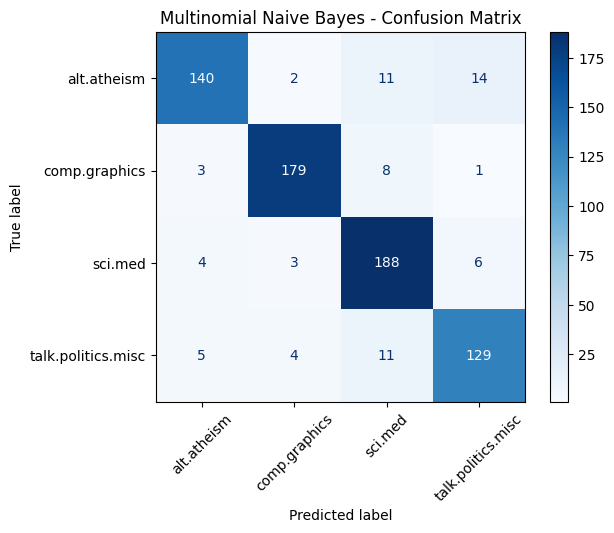

In [32]:
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# 7️⃣ Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Multinomial Naive Bayes - Confusion Matrix")
plt.show()